# Student Performance Analysis

###### Problem Statement:
    Give the insights of students performance in Maths subject, give the reasons of good and bad performance of both male and female students.

### Exploratory Data Analysis (EDA)

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('C:/Users/Rebel/Desktop/DS/PROJECTS/Student Performance Analysis/stud.csv')
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
gender_counts = df['gender'].value_counts()
gender_counts

female    518
male      482
Name: gender, dtype: int64

In [7]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


##### Number of students who got full marks and less than 25 marks in each test.

In [8]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [9]:
reading_less_25 = df[df['reading_score'] <= 25]['average'].count()
writing_less_25 = df[df['writing_score'] <= 25]['average'].count()
math_less_25 = df[df['math_score'] <= 25]['average'].count()

print(f'Number of students with less than 25 marks in Maths: {math_less_25}')
print(f'Number of students with less than 25 marks in Writing: {writing_less_25}')
print(f'Number of students with less than 25 marks in Reading: {reading_less_25}')

Number of students with less than 25 marks in Maths: 7
Number of students with less than 25 marks in Writing: 5
Number of students with less than 25 marks in Reading: 4


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

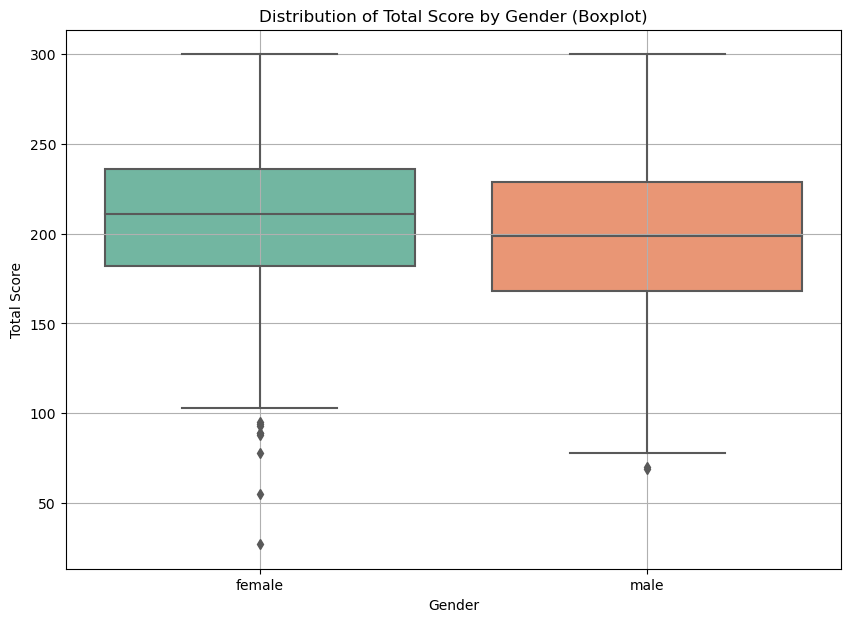

In [11]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='gender', y='total score', palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Total Score')
plt.title('Distribution of Total Score by Gender (Boxplot)')
plt.grid(True)
plt.show()

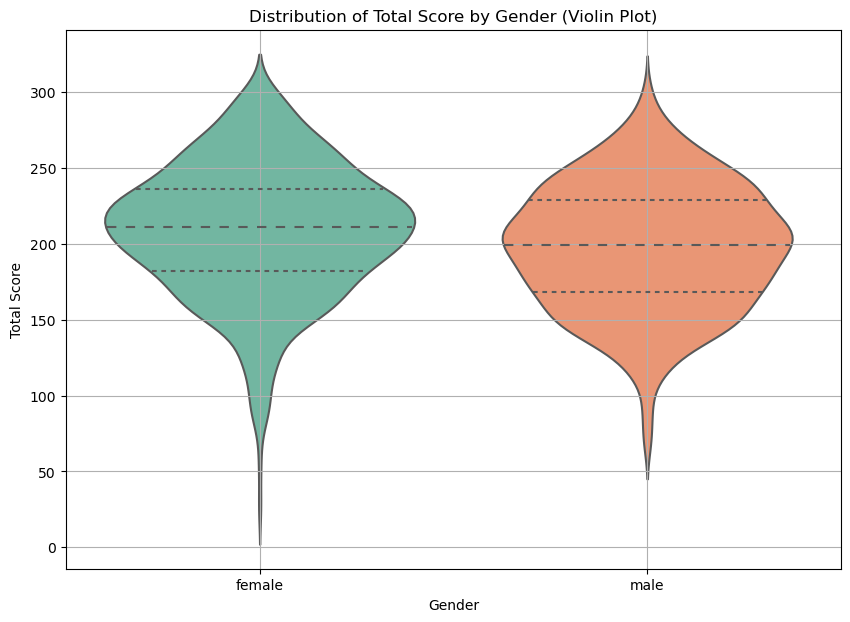

In [12]:
plt.figure(figsize=(10, 7))
sns.violinplot(data=df, x='gender', y='total score', palette='Set2', inner='quartile')
plt.xlabel('Gender')
plt.ylabel('Total Score')
plt.title('Distribution of Total Score by Gender (Violin Plot)')
plt.grid(True)
plt.show()

##### Insights:
    Female students tend to perform well then male students.

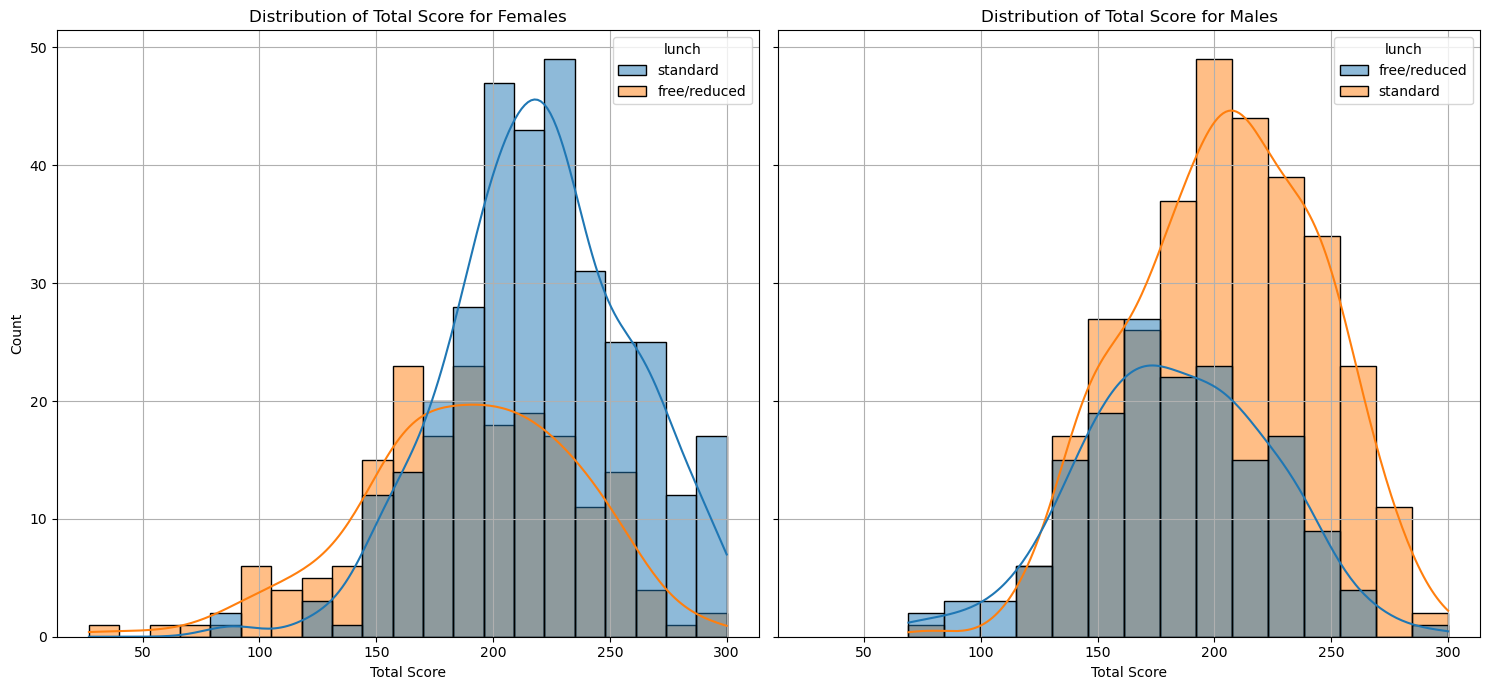

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharex=True, sharey=True)

genders = df['gender'].unique()  # Get unique gender values

for i, gender in enumerate(genders):
    sns.histplot(data=df[df['gender'] == gender], x='total score', kde=True, hue='lunch', ax=axes[i])
    axes[i].set_title(f'Distribution of Total Score for {gender.capitalize()}s')
    axes[i].set_xlabel('Total Score')
    axes[i].set_ylabel('Count')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

##### Insights:
    Standard lunch helps perform well in exams be it a male or a female.

##### Students who failed in subject

In [14]:
# Filtering failed students
failed_students = df[df['average'] < 35]

In [15]:
# Filtering failed male students
failed_male_students = failed_students[failed_students['gender'] == 'male']
failed_male_students

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
76,male,group E,some high school,standard,none,30,26,22,78,26.000000
91,male,group C,high school,free/reduced,none,27,34,36,97,32.333333
211,male,group C,some college,free/reduced,none,35,28,27,90,30.000000
327,male,group A,some college,free/reduced,none,28,23,19,70,23.333333
596,male,group B,high school,free/reduced,none,30,24,15,69,23.000000
896,male,group B,high school,free/reduced,none,36,29,27,92,30.666667


In [16]:
# Filtering failed male students
failed_female_students = failed_students[failed_students['gender'] == 'female']
failed_female_students

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
17,female,group B,some high school,free/reduced,none,18,32,28,78,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.000000
145,female,group C,some college,free/reduced,none,22,39,33,94,31.333333
338,female,group B,some high school,free/reduced,none,24,38,27,89,29.666667
363,female,group D,some high school,free/reduced,none,27,34,32,93,31.000000
466,female,group D,associate's degree,free/reduced,none,26,31,38,95,31.666667
555,female,group C,some college,free/reduced,none,32,39,33,104,34.666667
601,female,group C,high school,standard,none,29,29,30,88,29.333333
787,female,group B,some college,standard,none,19,38,32,89,29.666667
842,female,group B,high school,free/reduced,completed,23,44,36,103,34.333333


In [17]:
# Counting the number of male and female students who failed
num_failed_male = failed_male_students.shape[0]
num_failed_female = failed_female_students.shape[0]

# Displaying the counts
print(f"Number of male students who failed: {num_failed_male}")
print(f"Number of female students who failed: {num_failed_female}")

Number of male students who failed: 6
Number of female students who failed: 12


##### Insights:
    There are 6 Male and 12 Female students who failed :
    > They have not completed "test_preparation_course" (i.e. "none").
    > There "lunch" was "free/reduced"; Thus,need of improvement in lunch of "free/reduced".

###### Students who got marks between 25 to 50

In [18]:
# Filtering male students with marks between 25 and 50 in any subject
male_marks_25_to_50 = df[(df['gender'] == 'male') & 
                         ((df['math_score'].between(25, 50)) |
                          (df['reading_score'].between(25, 50)) |
                          (df['writing_score'].between(25, 50)))]
male_marks_25_to_50

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
7,male,group B,some college,free/reduced,none,40,43,39,122,40.666667
11,male,group D,associate's degree,standard,none,40,52,43,135,45.000000
18,male,group C,master's degree,free/reduced,completed,46,42,46,134,44.666667
22,male,group D,some college,standard,none,44,54,53,151,50.333333
...,...,...,...,...,...,...,...,...,...,...
906,male,group B,high school,standard,none,57,48,51,156,52.000000
910,male,group D,bachelor's degree,free/reduced,none,50,42,48,140,46.666667
928,male,group E,associate's degree,free/reduced,completed,46,43,44,133,44.333333
948,male,group B,some high school,free/reduced,completed,49,50,52,151,50.333333


In [19]:
# Filtering female students with marks between 25 and 50 in any subject
female_marks_25_to_50 = df[(df['gender'] == 'female') & 
                         ((df['math_score'].between(25, 50)) |
                          (df['reading_score'].between(25, 50)) |
                          (df['writing_score'].between(25, 50)))]
female_marks_25_to_50

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
9,female,group B,high school,free/reduced,none,38,60,50,148,49.333333
14,female,group A,master's degree,standard,none,50,53,58,161,53.666667
17,female,group B,some high school,free/reduced,none,18,32,28,78,26.000000
37,female,group D,some high school,free/reduced,none,50,64,59,173,57.666667
44,female,group E,associate's degree,free/reduced,none,50,56,54,160,53.333333
...,...,...,...,...,...,...,...,...,...,...
961,female,group D,some high school,free/reduced,none,48,54,53,155,51.666667
972,female,group A,high school,free/reduced,completed,53,50,60,163,54.333333
973,female,group D,some college,free/reduced,none,49,65,61,175,58.333333
986,female,group C,associate's degree,standard,none,40,59,51,150,50.000000


In [20]:
# Counting the number of male and female students who got marks from 25 to 50
num_male = male_marks_25_to_50.shape[0]
num_female = female_marks_25_to_50.shape[0]

# Displaying the counts
print(f"Number of male students who got marks from 25 to 50: {num_male}")
print(f"Number of female students who got marks from 25 to 50: {num_female}")

Number of male students who got marks from 25 to 50: 104
Number of female students who got marks from 25 to 50: 98


In [21]:
# Filtering male students who did not complete their test preparation course and got marks between 25 and 50
male_not_completed_prep_course = df[(df['gender'] == 'male') & 
                                    (df['test_preparation_course'] == 'none') &
                                    ((df['math_score'].between(25, 50)) | 
                                     (df['reading_score'].between(25, 50)) | 
                                     (df['writing_score'].between(25, 50)))]

# Counting the number of such students
num_male_not_completed_prep_course = male_not_completed_prep_course.shape[0]

# Displaying the count
print(f"Number of male students who did not complete their test preparation course and got marks between 25 to 50: {num_male_not_completed_prep_course}")


Number of male students who did not complete their test preparation course and got marks between 25 to 50: 84


In [22]:
# Filtering male students who did not complete their test preparation course and got marks between 25 and 50
male_completed_prep_course = df[(df['gender'] == 'male') & 
                                    (df['test_preparation_course'] == 'completed') &
                                    ((df['math_score'].between(25, 50)) | 
                                     (df['reading_score'].between(25, 50)) | 
                                     (df['writing_score'].between(25, 50)))]

# Counting the number of such students
num_male_completed_prep_course = male_completed_prep_course.shape[0]

# Displaying the count
print(f"Number of male students who completed their test preparation course and got marks between 25 to 50: {num_male_completed_prep_course}")


Number of male students who completed their test preparation course and got marks between 25 to 50: 20


In [23]:
male_completed_prep_course

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
18,male,group C,master's degree,free/reduced,completed,46,42,46,134,44.666667
82,male,group A,some college,free/reduced,completed,50,47,54,151,50.333333
93,male,group C,associate's degree,free/reduced,completed,43,45,50,138,46.000000
103,male,group B,high school,standard,completed,60,44,47,151,50.333333
131,male,group C,some high school,free/reduced,completed,53,37,40,130,43.333333
136,male,group B,some high school,standard,completed,51,54,41,146,48.666667
184,male,group C,some high school,free/reduced,completed,45,52,49,146,48.666667
250,male,group A,some high school,standard,completed,47,49,49,145,48.333333
296,male,group A,some high school,standard,completed,46,41,43,130,43.333333
298,male,group C,high school,free/reduced,completed,40,46,50,136,45.333333


In [24]:
# Filtering male students who did not complete their test preparation course and got marks between 25 and 50
female_not_completed_prep_course = df[(df['gender'] == 'female') & 
                                    (df['test_preparation_course'] == 'none') &
                                    ((df['math_score'].between(25, 50)) | 
                                     (df['reading_score'].between(25, 50)) | 
                                     (df['writing_score'].between(25, 50)))]

# Counting the number of such students
num_female_not_completed_prep_course = female_not_completed_prep_course.shape[0]

# Displaying the count
print(f"Number of female students who did not complete their test preparation course and got marks between 25 to 50: {num_female_not_completed_prep_course}")


Number of female students who did not complete their test preparation course and got marks between 25 to 50: 78


In [25]:
# Filtering male students who did not complete their test preparation course and got marks between 25 and 50
female_completed_prep_course = df[(df['gender'] == 'female') & 
                                    (df['test_preparation_course'] == 'completed') &
                                    ((df['math_score'].between(25, 50)) | 
                                     (df['reading_score'].between(25, 50)) | 
                                     (df['writing_score'].between(25, 50)))]

# Counting the number of such students
num_female_completed_prep_course = female_completed_prep_course.shape[0]

# Displaying the count
print(f"Number of female students who complete their test preparation course and got marks between 25 to 50: {num_female_completed_prep_course}")

Number of female students who complete their test preparation course and got marks between 25 to 50: 20


In [26]:
female_completed_prep_course

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
142,female,group E,some college,free/reduced,completed,42,55,54,151,50.333333
174,female,group C,bachelor's degree,free/reduced,completed,43,51,54,148,49.333333
176,female,group B,high school,free/reduced,completed,46,54,58,158,52.666667
339,female,group D,some high school,free/reduced,completed,35,55,60,150,50.000000
357,female,group C,some college,free/reduced,completed,42,66,69,177,59.000000
371,female,group C,some college,free/reduced,completed,45,73,70,188,62.666667
422,female,group D,master's degree,free/reduced,completed,47,58,67,172,57.333333
573,female,group C,high school,free/reduced,completed,50,66,64,180,60.000000
578,female,group B,some college,free/reduced,completed,48,56,58,162,54.000000
629,female,group C,some high school,standard,completed,44,51,55,150,50.000000


##### Insights:
    Number of male students who got marks from 25 to 50:   104
    Number of female students who got marks from 25 to 50:  98

    There are total 20 male and 20 female who "completed" thier "test_preparation_course"
    and got marks between 25 to 50.
    > "Lunch" type was "free/reduced"; Thus need of improvement in "free/reduced" type of lunch.
    
    There are total 84 male and 78 female who "not completed" thier "test_preparation_course"
    and got marks between 25 to 50.
    > Those students needs to complete their "test_preparation_course".
    > "Lunch" type was "free/reduced"; Thus need of improvement in "free/reduced" type of lunch.

##### Students who got marks between 51 to 100

In [27]:
# Filtering male students with marks between 51 and 100 in any subject
male_marks_51_to_100 = df[(df['gender'] == 'male') & 
                         ((df['math_score'].between(51, 100)) |
                          (df['reading_score'].between(51, 100)) |
                          (df['writing_score'].between(51, 100)))]
male_marks_51_to_100

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.000000
10,male,group C,associate's degree,standard,none,58,54,52,164,54.666667
11,male,group D,associate's degree,standard,none,40,52,43,135,45.000000
...,...,...,...,...,...,...,...,...,...,...
985,male,group A,high school,standard,none,57,51,54,162,54.000000
987,male,group E,some high school,standard,completed,81,75,76,232,77.333333
990,male,group E,high school,free/reduced,completed,86,81,75,242,80.666667
994,male,group A,high school,standard,none,63,63,62,188,62.666667


In [28]:
# Filtering female students with marks between 51 and 100 in any subject
female_marks_51_to_100 = df[(df['gender'] == 'female') & 
                         ((df['math_score'].between(51, 100)) |
                          (df['reading_score'].between(51, 100)) |
                          (df['writing_score'].between(51, 100)))]
female_marks_51_to_100

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
5,female,group B,associate's degree,standard,none,71,83,78,232,77.333333
6,female,group B,some college,standard,completed,88,95,92,275,91.666667
...,...,...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,free/reduced,none,62,72,74,208,69.333333
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [29]:
# Counting the number of male and female students who got marks from 51 to 100
num_male = male_marks_51_to_100.shape[0]
num_female = female_marks_51_to_100.shape[0]

# Displaying the counts
print(f"Number of male students who got marks from 51 to 100: {num_male}")
print(f"Number of female students who got marks from 51 to 100: {num_female}")

Number of male students who got marks from 51 to 100: 448
Number of female students who got marks from 51 to 100: 490


In [30]:
# Filtering male students who did not complete their test preparation course and got marks between 51 and 100
male_not_completed_prep_course = df[(df['gender'] == 'male') & 
                                    (df['test_preparation_course'] == 'none') &
                                    ((df['math_score'].between(51, 100)) | 
                                     (df['reading_score'].between(51, 100)) | 
                                     (df['writing_score'].between(51, 100)))]

# Counting the number of such students
num_male_not_completed_prep_course = male_not_completed_prep_course.shape[0]

# Displaying the count
print(f"Number of male students who did not complete their test preparation course and got marks between 51 to 100: {num_male_not_completed_prep_course}")


Number of male students who did not complete their test preparation course and got marks between 51 to 100: 281


In [31]:
male_not_completed_prep_course.head(20)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
10,male,group C,associate's degree,standard,none,58,54,52,164,54.666667
11,male,group D,associate's degree,standard,none,40,52,43,135,45.000000
16,male,group C,high school,standard,none,88,89,86,263,87.666667
20,male,group D,high school,standard,none,66,69,63,198,66.000000
22,male,group D,some college,standard,none,44,54,53,151,50.333333
25,male,group A,master's degree,free/reduced,none,73,74,72,219,73.000000
26,male,group B,some college,standard,none,69,54,55,178,59.333333
28,male,group C,high school,standard,none,70,70,65,205,68.333333


In [32]:
# Filtering male students who completed their test preparation course and got marks between 51 and 100
male_completed_prep_course = df[(df['gender'] == 'male') & 
                                    (df['test_preparation_course'] == 'completed') &
                                    ((df['math_score'].between(51, 100)) | 
                                     (df['reading_score'].between(51, 100)) | 
                                     (df['writing_score'].between(51, 100)))]

# Counting the number of such students
num_male_completed_prep_course = male_completed_prep_course.shape[0]

# Displaying the count
print(f"Number of male students who completed their test preparation course and got marks between 51 to 100: {num_male_completed_prep_course}")


Number of male students who completed their test preparation course and got marks between 51 to 100: 167


In [33]:
male_completed_prep_course.head(20)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.000000
13,male,group A,some college,standard,completed,78,72,70,220,73.333333
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80,225,75.000000
35,male,group E,associate's degree,standard,completed,81,81,79,241,80.333333
43,male,group B,some college,free/reduced,completed,59,65,66,190,63.333333
49,male,group C,high school,standard,completed,82,84,82,248,82.666667
51,male,group E,associate's degree,free/reduced,completed,77,69,68,214,71.333333
58,male,group D,some college,standard,completed,58,59,58,175,58.333333
60,male,group E,bachelor's degree,free/reduced,completed,79,74,72,225,75.000000
71,male,group D,some college,standard,completed,63,55,63,181,60.333333


In [34]:
# Filtering female students who did not complete their test preparation course and got marks between 51 and 100
female_not_completed_prep_course = df[(df['gender'] == 'female') & 
                                    (df['test_preparation_course'] == 'none') &
                                    ((df['math_score'].between(51, 100)) | 
                                     (df['reading_score'].between(51, 100)) | 
                                     (df['writing_score'].between(51, 100)))]

# Counting the number of such students
num_female_not_completed_prep_course = female_not_completed_prep_course.shape[0]

# Displaying the count
print(f"Number of male students who did not complete their test preparation course and got marks between 51 to 100: {num_female_not_completed_prep_course}")


Number of male students who did not complete their test preparation course and got marks between 51 to 100: 309


In [35]:
# Filtering male students who completed their test preparation course and got marks between 51 and 100
female_completed_prep_course = df[(df['gender'] == 'female') & 
                                    (df['test_preparation_course'] == 'completed') &
                                    ((df['math_score'].between(51, 100)) | 
                                     (df['reading_score'].between(51, 100)) | 
                                     (df['writing_score'].between(51, 100)))]

# Counting the number of such students
num_female_completed_prep_course = female_completed_prep_course.shape[0]

# Displaying the count
print(f"Number of male students who completed their test preparation course and got marks between 51 to 100: {num_female_completed_prep_course}")


Number of male students who completed their test preparation course and got marks between 51 to 100: 181


In [36]:
female_completed_prep_course.head(20)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
6,female,group B,some college,standard,completed,88,95,92,275,91.666667
21,female,group B,some college,free/reduced,completed,65,75,70,210,70.000000
38,female,group D,associate's degree,free/reduced,completed,75,90,88,253,84.333333
46,female,group A,associate's degree,standard,completed,55,65,62,182,60.666667
48,female,group D,associate's degree,free/reduced,completed,57,74,76,207,69.000000
54,female,group C,some high school,free/reduced,completed,71,84,87,242,80.666667
56,female,group E,associate's degree,standard,completed,82,85,86,253,84.333333
70,female,group D,some college,free/reduced,completed,58,63,73,194,64.666667
78,female,group D,some high school,standard,completed,61,74,72,207,69.000000


##### Insights:
    Male and Female students who got 51 to 100 marks
    > There "Lunch" type was "Standard" and they "Completed" there "test_preparation_course".

##### Students who got marks 100

In [40]:
# Filtering male students who got full marks : 100
male_full_marks = df[(df['gender'] == 'male') & 
                     ((df['math_score'] == 100) |
                      (df['reading_score'] == 100) |
                      (df['writing_score'] == 100))]
male_full_marks

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.666667
381,male,group C,associate's degree,standard,completed,87,100,95,282,94.000000
623,male,group A,some college,standard,completed,100,96,86,282,94.000000
625,male,group D,some college,standard,completed,100,97,99,296,98.666667
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.000000


In [41]:
# Filtering female students who got full marks : 100
female_full_marks = df[(df['gender'] == 'female') & 
                     ((df['math_score'] == 100) |
                      (df['reading_score'] == 100) |
                      (df['writing_score'] == 100))]
female_full_marks

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
106,female,group D,master's degree,standard,none,87,100,100,287,95.666667
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667
179,female,group D,some high school,standard,completed,97,100,100,297,99.000000
377,female,group D,master's degree,free/reduced,completed,85,95,100,280,93.333333
403,female,group D,high school,standard,completed,88,99,100,287,95.666667
451,female,group E,some college,standard,none,100,92,97,289,96.333333
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000
546,female,group A,some high school,standard,completed,92,100,97,289,96.333333
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100,292,97.333333


In [39]:
# Counting the number of male and female students who got full marks i.e 100
num_male = male_full_marks.shape[0]
num_female = female_full_marks.shape[0]

# Displaying the counts
print(f"Number of male students who got full marks i.e. 100: {num_male}")
print(f"Number of female students who got full marks i.e. 100: {num_female}")

Number of male students who got full marks i.e. 100: 5
Number of female students who got full marks i.e. 100: 18


##### Insights:
      Students who got  full marks 100:
    > They have "Completed" there "test_preparation_course"
    > There "parental_level_of_education" is higher
    > There "Lunch" type is "Standard".

### Conclusion:-

###### 1.) If "Lunch" type is "Standard" than Student performance will increase.
###### 2.) If "parental_level_of_education" is higher and "test_preparation_course" is completed than Lunch type will not effect on students performance.

###### Main Insight:
     > Lunch type should be upgraded to "Standard" in all Schools.
     > All students should "Complete" there "test_preparation_course".